# Выставление приоритетов при анализе рубок

Документ содержит графики и сопутствующие материалы, цель анализа которых - поиск перспективных подходов к выставлению приоритеотов.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series

В файле log.prior.csv.gz лежат случайно сгенерированные точки, в атрибуте dist_logg хранится расстояние до ближайшей известной рубки (dist_logg==0 означает, что точка была взята в самой рубке). 

In [3]:
filename = 'data/log.prior.csv.gz'
df = pd.read_csv(filename, index_col=0)

df.tail()

,dist_asfalt,dist_good,dist_grunt,dist_land,dist_other,dist_railway,dist_vudela,dist_logg,x,y
cat,,,,,,,,,,
11936,24284.017380,8078.393196,5660.701153,23401.712181,41935.189170,29160.323528,13926.489258,17688.949960,469228.318677,5.264063e+06
11937,33223.266731,4557.957675,4466.300000,381.828386,8184.291179,145596.847436,5684.891113,5381.134345,537941.447430,5.037860e+06
11938,18836.946422,10820.687395,3653.331562,339.403010,7014.514062,70101.717808,5278.328613,10751.768461,510721.957356,5.132650e+06
11939,12932.127717,6615.825941,1592.059835,2092.164298,3708.246446,17704.366011,22579.507812,23209.993131,467202.317708,5.181517e+06
11940,3282.267963,8078.947600,629.104515,1230.000000,22316.866220,47476.769204,12928.209961,11007.283020,446895.875266,5.098290e+06


In [4]:
alerts = df[df.dist_logg == 0]
alerts.describe()

,dist_asfalt,dist_good,dist_grunt,dist_land,dist_other,dist_railway,dist_vudela,dist_logg,x,y
count,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.0,1938.000000,1.938000e+03
mean,26590.831447,13418.495641,4302.478096,6726.258055,22212.699607,99238.698740,7859.410602,0.0,518658.697563,5.142442e+06
std,20173.350789,11759.974557,7544.837918,11878.955511,15534.524109,43932.030195,8540.895928,0.0,39668.303733,9.094259e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,4060.488653,0.000000,0.0,436748.435923,4.986942e+06
25%,10290.825677,4682.014895,666.604515,389.981052,9519.263743,70344.798805,2261.754517,0.0,488942.229718,5.065538e+06
50%,23993.373400,10004.157344,1769.438969,1159.851241,18932.878846,99770.857684,5098.658203,0.0,514915.474884,5.117437e+06
75%,38197.265511,20453.732232,4351.719196,6119.366227,31518.315530,131853.055441,9888.869141,0.0,552367.496866,5.233773e+06
max,94650.385297,68623.885448,52206.483776,63825.899244,71690.734362,192437.551138,42756.656250,0.0,590055.035574,5.289266e+06


In [5]:
nonalerts = df[df.dist_logg > 0]
nonalerts.describe()

,dist_asfalt,dist_good,dist_grunt,dist_land,dist_other,dist_railway,dist_vudela,dist_logg,x,y
count,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9.884000e+03
mean,23564.872306,12119.847817,4862.453192,6911.097526,20194.759527,94207.467028,11945.260557,11783.557445,512799.851587,5.138267e+06
std,19766.336017,11369.275753,7873.014089,12675.631102,18405.434174,51651.877229,10052.325083,10842.243718,44818.206304,8.744350e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.377063,436740.379318,4.986935e+06
25%,7619.353334,4027.067007,920.932901,551.529891,5592.561315,51522.227360,4259.788330,3442.508343,473399.599108,5.062047e+06
50%,18131.599831,8879.568570,2139.315558,1419.376774,14168.097317,96692.661950,8811.845703,7897.425625,511663.321640,5.140286e+06
75%,35389.198891,16359.555613,4727.794856,4667.009355,29812.672487,133767.116630,17082.805176,17436.867833,552052.765743,5.212100e+06
max,100218.477540,68102.389514,59665.197331,70885.974912,84244.594686,216579.171743,51661.781250,48513.277419,590044.248090,5.289248e+06


In [6]:
data = df[df.columns[:-2]]
data.describe()

,dist_asfalt,dist_good,dist_grunt,dist_land,dist_other,dist_railway,dist_vudela,dist_logg
count,11822.000000,11822.000000,11822.000000,11822.000000,11822.000000,11822.000000,11822.000000,11822.000000
mean,24060.922789,12332.737301,4770.655549,6880.796486,20525.563780,95032.245158,11275.460421,9851.859397
std,19864.384869,11443.836910,7822.594814,12548.197516,17981.188356,50499.985735,9935.999227,10831.167241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8054.885273,4116.996342,872.102832,517.257181,6167.589218,53568.768871,3789.633057,1539.042780
50%,18791.909507,9043.175127,2074.253763,1387.610583,15060.104980,97275.613364,8109.778076,5777.284184
75%,35853.575632,16950.390806,4656.380644,4788.673224,30639.157304,133518.196379,15792.748535,14842.559044
max,100218.477540,68623.885448,59665.197331,70885.974912,84244.594686,216579.171743,51661.781250,48513.277419


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d6048cc10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d50631dd0>]], dtype=object)

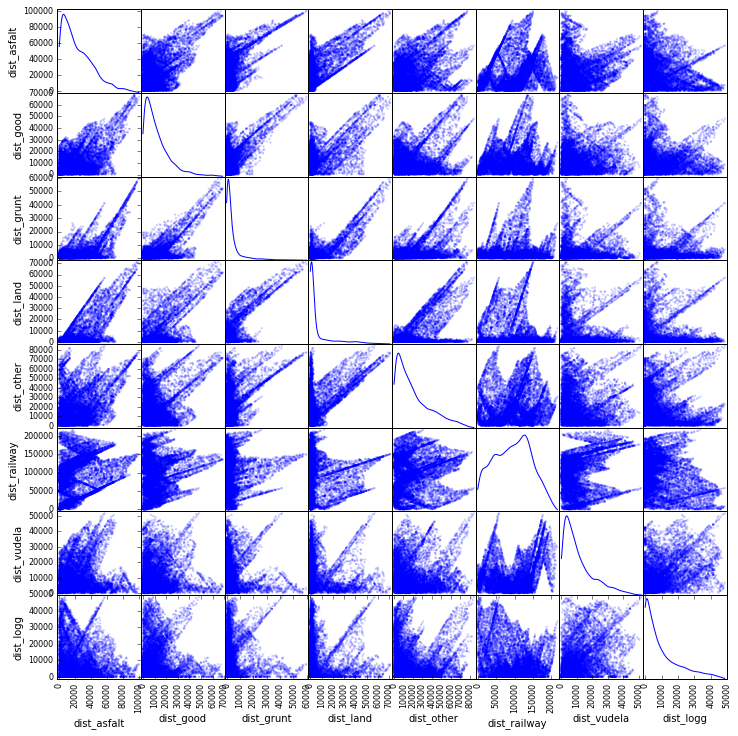

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(12, 12), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d3a958c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d32ef1490>]], dtype=object)

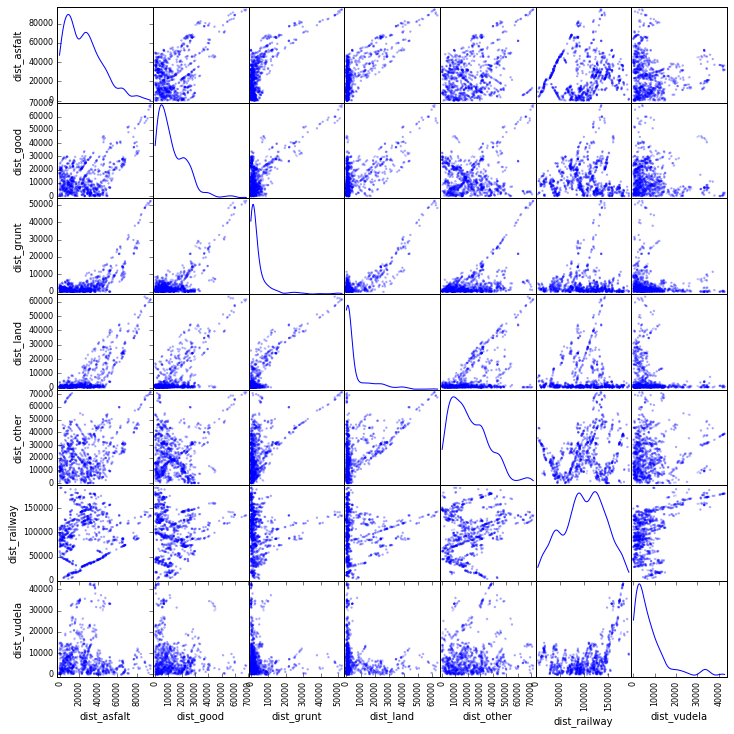

In [8]:
scatter_matrix(alerts[alerts.columns[:-3]], alpha=0.2, figsize=(12, 12), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d39f77710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d30944310>]], dtype=object)

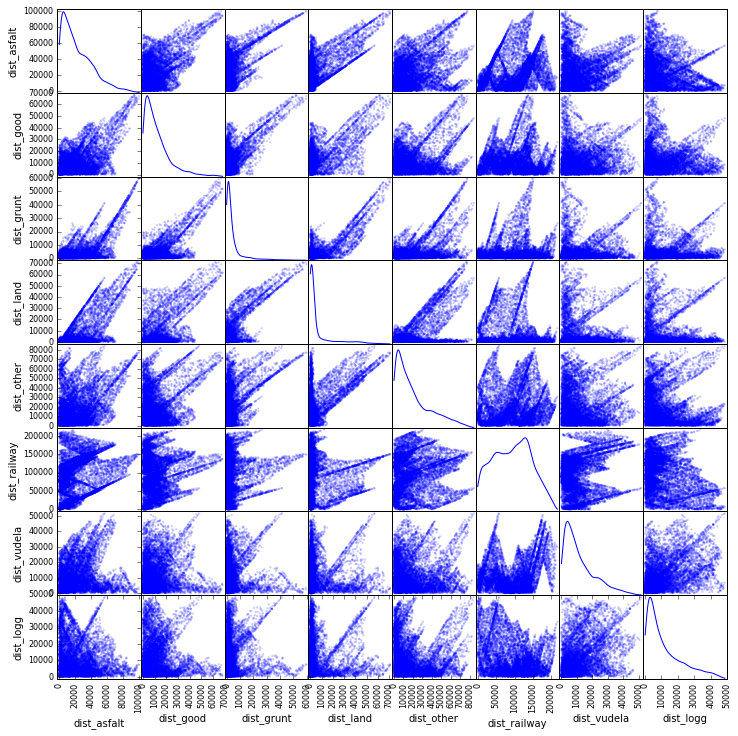

In [9]:
scatter_matrix(nonalerts[nonalerts.columns[:-2]], alpha=0.2, figsize=(12, 12), diagonal='kde')

In [10]:
df = pd.read_csv(filename, index_col=0)
df['is_logg'] = (df.dist_logg == 0).astype('int')

df['dist_asfalt'] = np.log1p(df['dist_asfalt'])
df['dist_good'] = np.log1p(df['dist_good'])
df['dist_grunt'] = np.log1p(df['dist_grunt'])
df['dist_land'] = np.log1p(df['dist_land'])
df['dist_other'] = np.log1p(df['dist_other'])
df['dist_vudela'] = np.log1p(df['dist_vudela'])

important = df[['dist_asfalt', 'dist_good', 'dist_grunt', 'dist_land', 'dist_other', 'dist_vudela', 'is_logg']]
important.tail()

,dist_asfalt,dist_good,dist_grunt,dist_land,dist_other,dist_vudela,is_logg
cat,,,,,,,
11936,10.097615,8.997072,8.641480,10.060607,10.643904,9.541620,0
11937,10.411036,8.424849,8.404539,5.947587,9.010094,8.645743,0
11938,9.843629,9.289307,8.203668,5.830130,8.855879,8.571554,0
11939,9.467547,8.797371,7.373412,7.646432,8.218584,10.024842,0
11940,8.096595,8.997141,6.445886,7.115582,10.013143,9.467244,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d308a6d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d2a8be090>]], dtype=object)

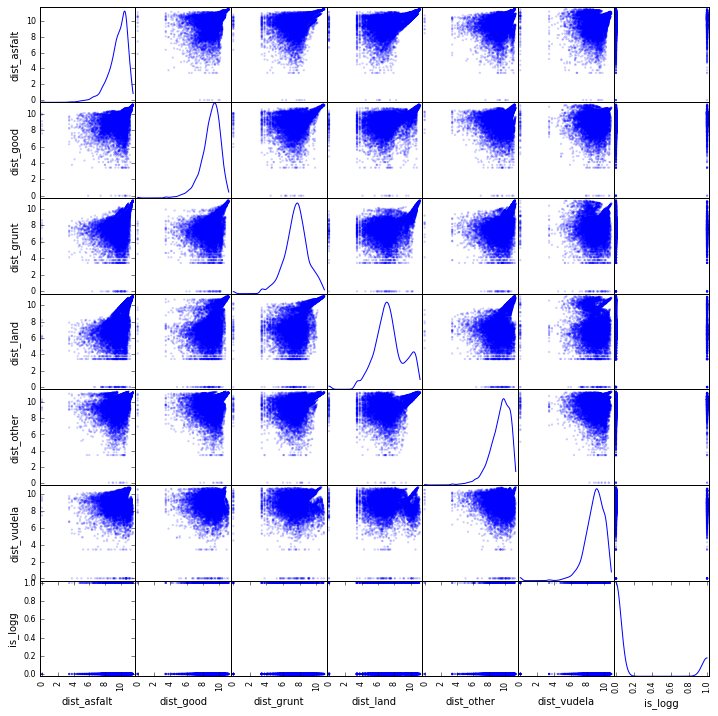

In [11]:
scatter_matrix(important, alpha=0.2, figsize=(12, 12), diagonal='kde')

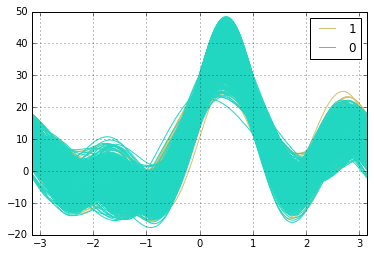

In [12]:
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates

andrews_curves(important, 'is_logg')
# parallel_coordinates(important, 'is_logg')